선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

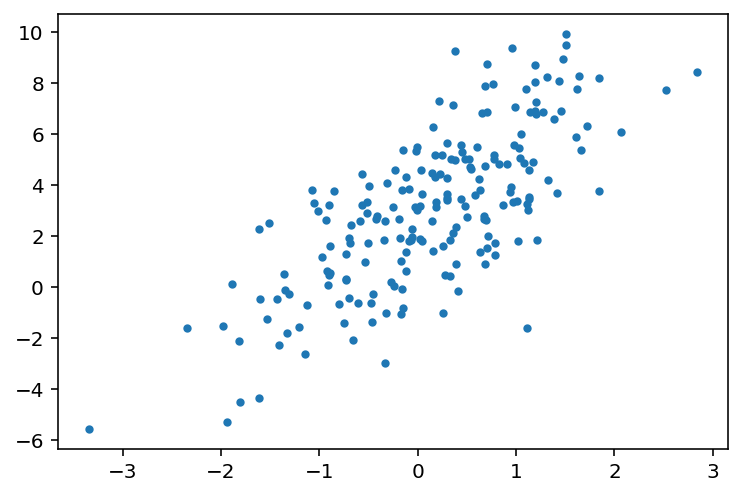

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [136]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.32100268]
2.7636444084578073


In [137]:
leg.coef_[0]

2.3210026844113982

In [138]:
leg.intercept_

2.7636444084578073

## 회귀직선

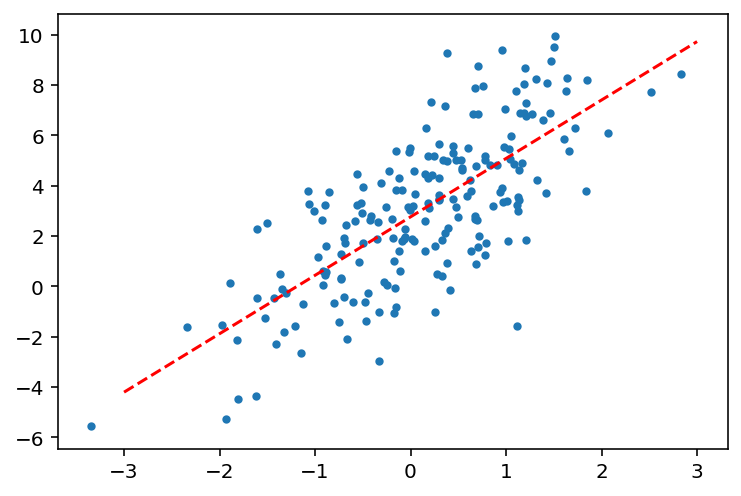

In [139]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 2)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

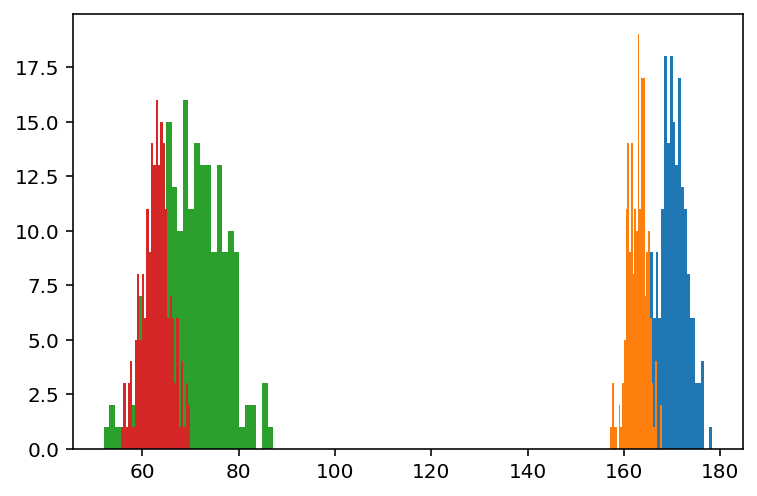

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 #  사람수 남여, 각각
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [141]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x2, y2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.5924462332166371

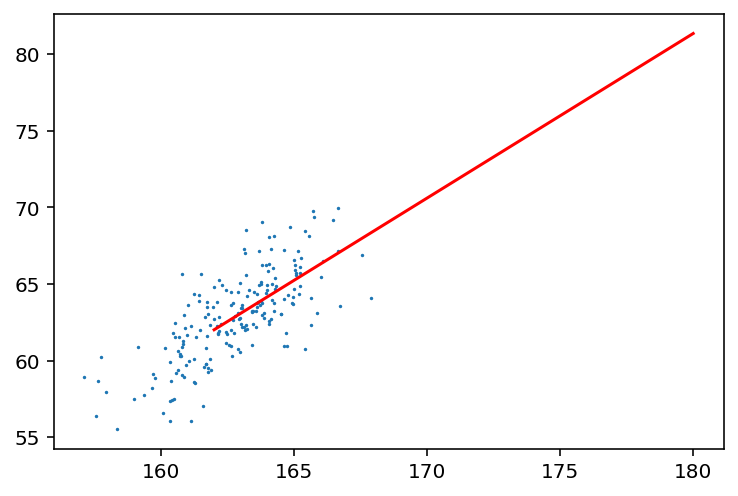

In [142]:
xs = np.linspace(162,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [143]:
x = np.concatenate((x1, x2)) # np.hstack((x1,x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.8194733470743387

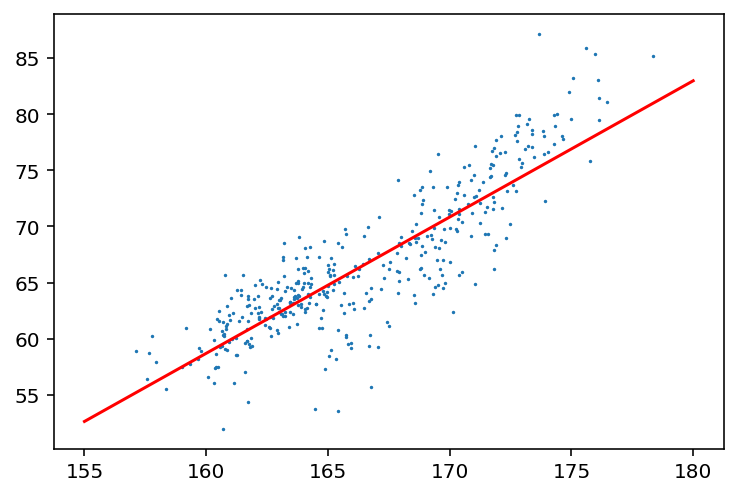

In [144]:
xs = np.linspace(155,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [145]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':1})
X2 = pd.DataFrame({'height':x2, 'sex':0})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,169.498954,1
1,173.382314,1
2,167.272294,1
3,166.419912,1
4,169.315419,1
...,...,...
395,164.621804,0
396,162.160265,0
397,163.406237,0
398,163.483417,0


In [146]:
# sex = [0]*n_samples + [1]*n_samples

In [147]:
# X = pd.DataFrame(x)
# X['sex'] = sex
# X

In [148]:
np.random.seed(19)
X_train, X_test, y_train, y_test = train_test_split(X, y)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.7941439454159269

## 성별을 고려하여 성능이 개선됨

In [149]:
print(leg.coef_)
print(leg.intercept_)

[ 1.72559525 -5.21708601]
-218.01259103732403


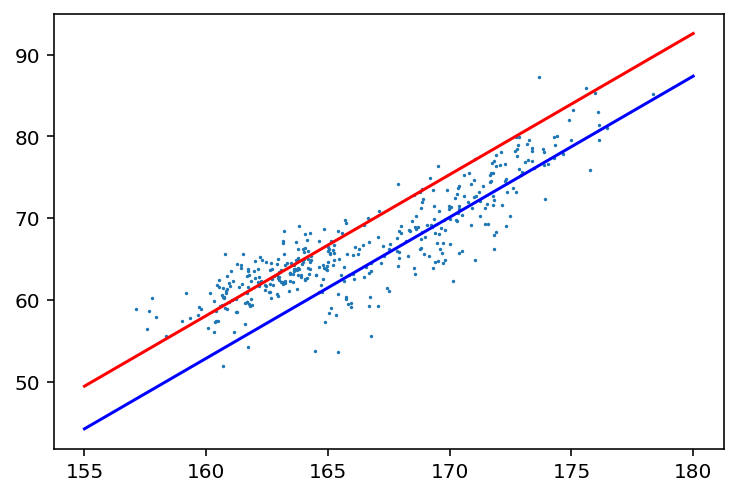

In [150]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류

In [151]:
X["weight"] = y
X[:10]

,height,sex,weight
0,169.498954,1,67.015543
1,173.382314,1,78.251965
2,167.272294,1,66.599622
3,166.419912,1,66.681071
4,169.315419,1,63.970162
5,170.152408,1,62.329666
6,169.798194,1,68.572221
7,172.273224,1,76.630964
8,169.333081,1,73.475195
9,166.679367,1,59.299858


In [152]:

y = X["sex"] ;y[:5]

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [153]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,169.498954,67.015543
1,173.382314,78.251965
2,167.272294,66.599622
3,166.419912,66.681071
4,169.315419,63.970162


In [154]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
clf = SGDClassifier() # (1) 모델 정의
clf.fit(X_train, y_train) #(2) 학습
clf.score(X_test, y_test) # accuracy

0.95

In [155]:
y_pred = clf.predict(X_test) # (3) 모델 사용

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [157]:
confusion_matrix(y_test, y_pred)

array([[47,  2],
       [ 3, 48]])

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [159]:
clf.coef_, clf.intercept_

(array([[ 8.55760442, -3.1621292 ]]), array([-0.14790704]))

In [160]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [161]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

In [162]:
m1,m2, s1, s2

(166.4525278735919, 66.66925506549258, 4.427064313012162, 6.3716499873624155)

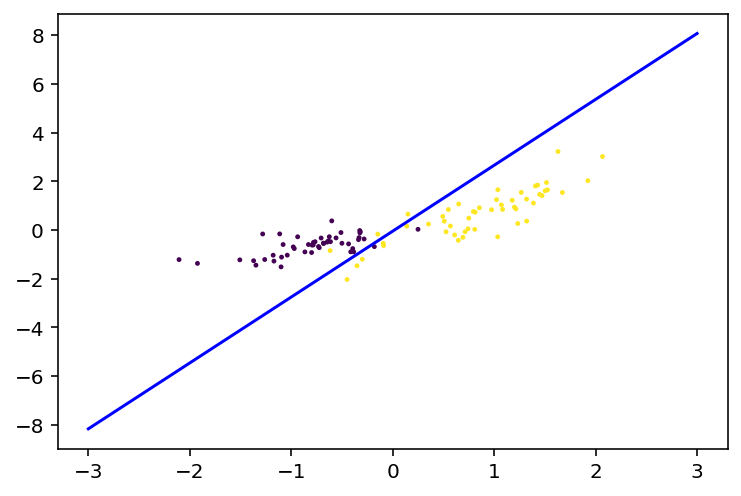

In [163]:
xs = np.linspace(-3,3,2)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

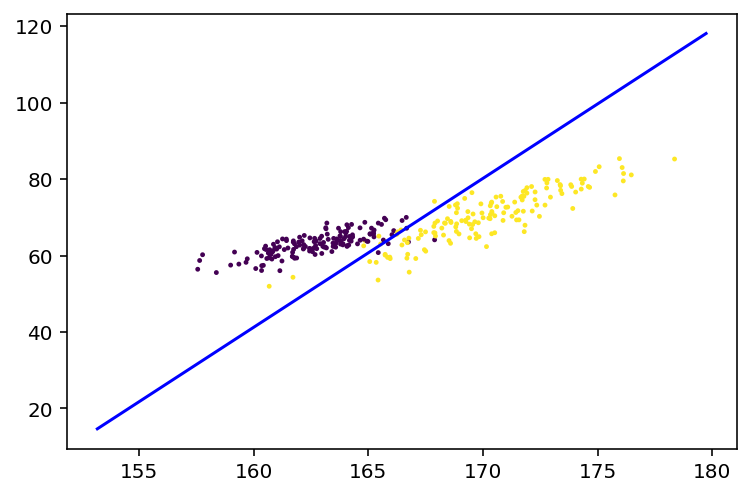

In [164]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [165]:
scores = clf.decision_function(X_test)

In [168]:
scores

array([ -5.17936734,   6.72646263,   0.78080809,  -4.0647269 ,
         3.05253637,  -2.65357002,   4.72890705,   5.55526587,
         4.27291989,   7.13933718,   7.61542792,  -5.14746208,
        -4.16315473,  -4.04948862,  -6.04109436,  -2.70960635,
       -14.32521142,   2.30222898,   7.98117965,   6.65120757,
         1.484891  ,   6.16646913,  -6.47651727,   7.69722715,
         3.59966607,  -4.77590747,  -0.87503992,  -2.86425982,
        -3.88460467,   9.28884295,   6.04521067,  -0.85384863,
        -6.34357731,  -5.22604766,  -2.54881941,   7.49113397,
         9.55686033,  -1.78874133,  -0.60105385, -12.27886667,
         4.20251521,   6.07351317,   4.49076579,   8.00469405,
        -6.95746874,  -2.00015588, -10.60263295,  -4.62307054,
        -7.8932477 ,   7.12759559,  -4.91150608,  -5.37423461,
         3.48868729,  -7.11843574,   6.72562848,   8.22169215,
        -7.11271549,  -4.22378929,   4.25575524,   4.66825602,
         9.90728685,   2.1030942 ,  -4.18497492,   9.58

In [166]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

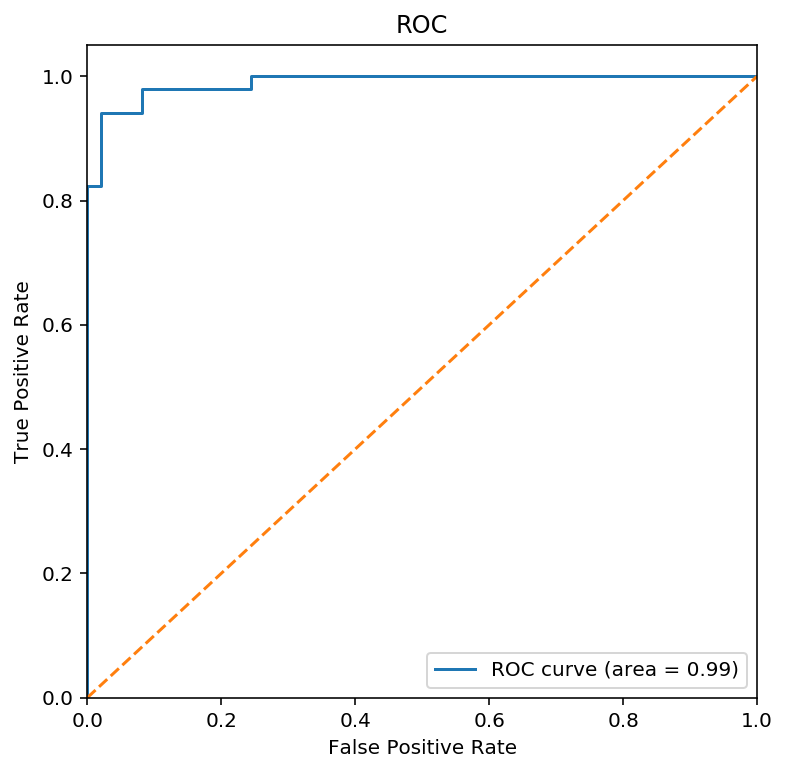

In [167]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20) # (1)
clf.fit(X_train, y_train) #(2)
clf.score(X_test, y_test)

0.95

## (참고) ROC 성능 비교

In [169]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


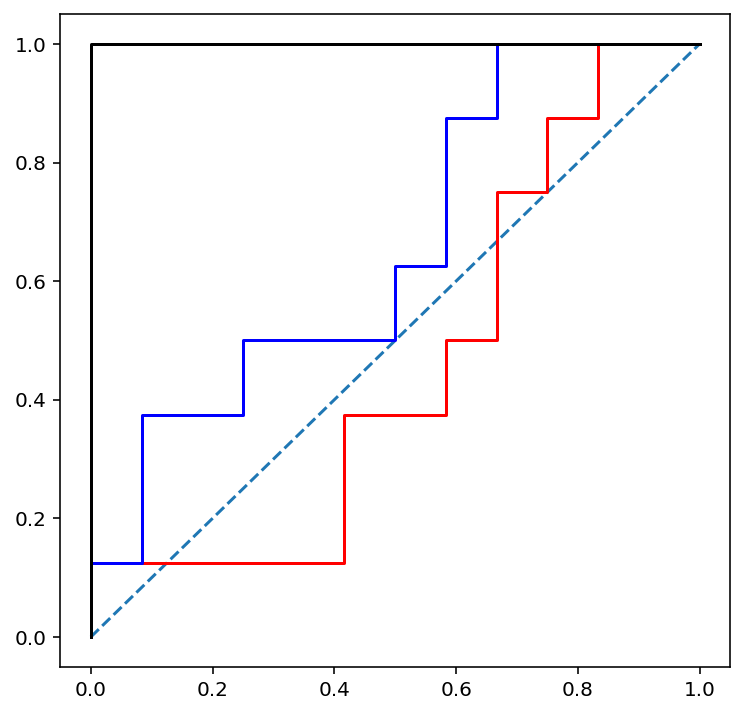

In [172]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])